# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [5]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [4]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

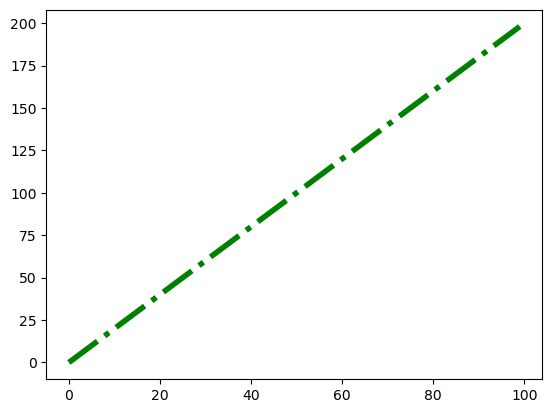

In [24]:
# Method 1
plt.plot(x,y,"g",linewidth=4,linestyle="dashdot")
plt.show()

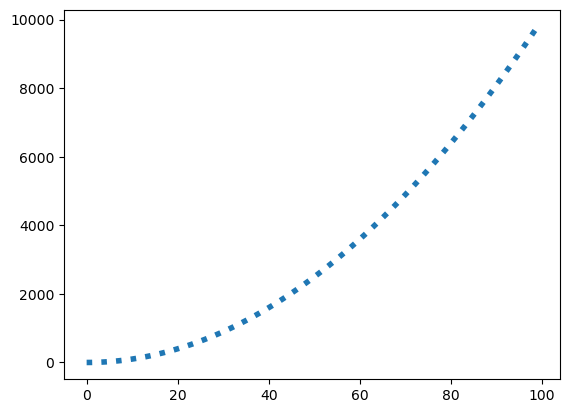

In [21]:
plt.plot(x,z,linewidth=4,linestyle="dotted")
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

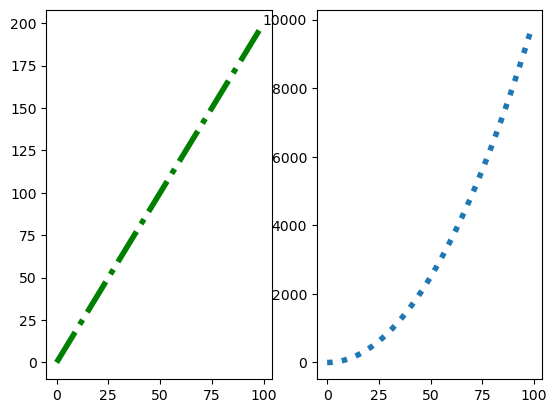

In [30]:
# Method 2
plot_options, (chart_1,chart_2) = plt.subplots(nrows=1,ncols=2)
chart_1.plot(x,y,"g",linewidth=4,linestyle="dashdot")
chart_2.plot(x,z,linewidth=4,linestyle="dotted")
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

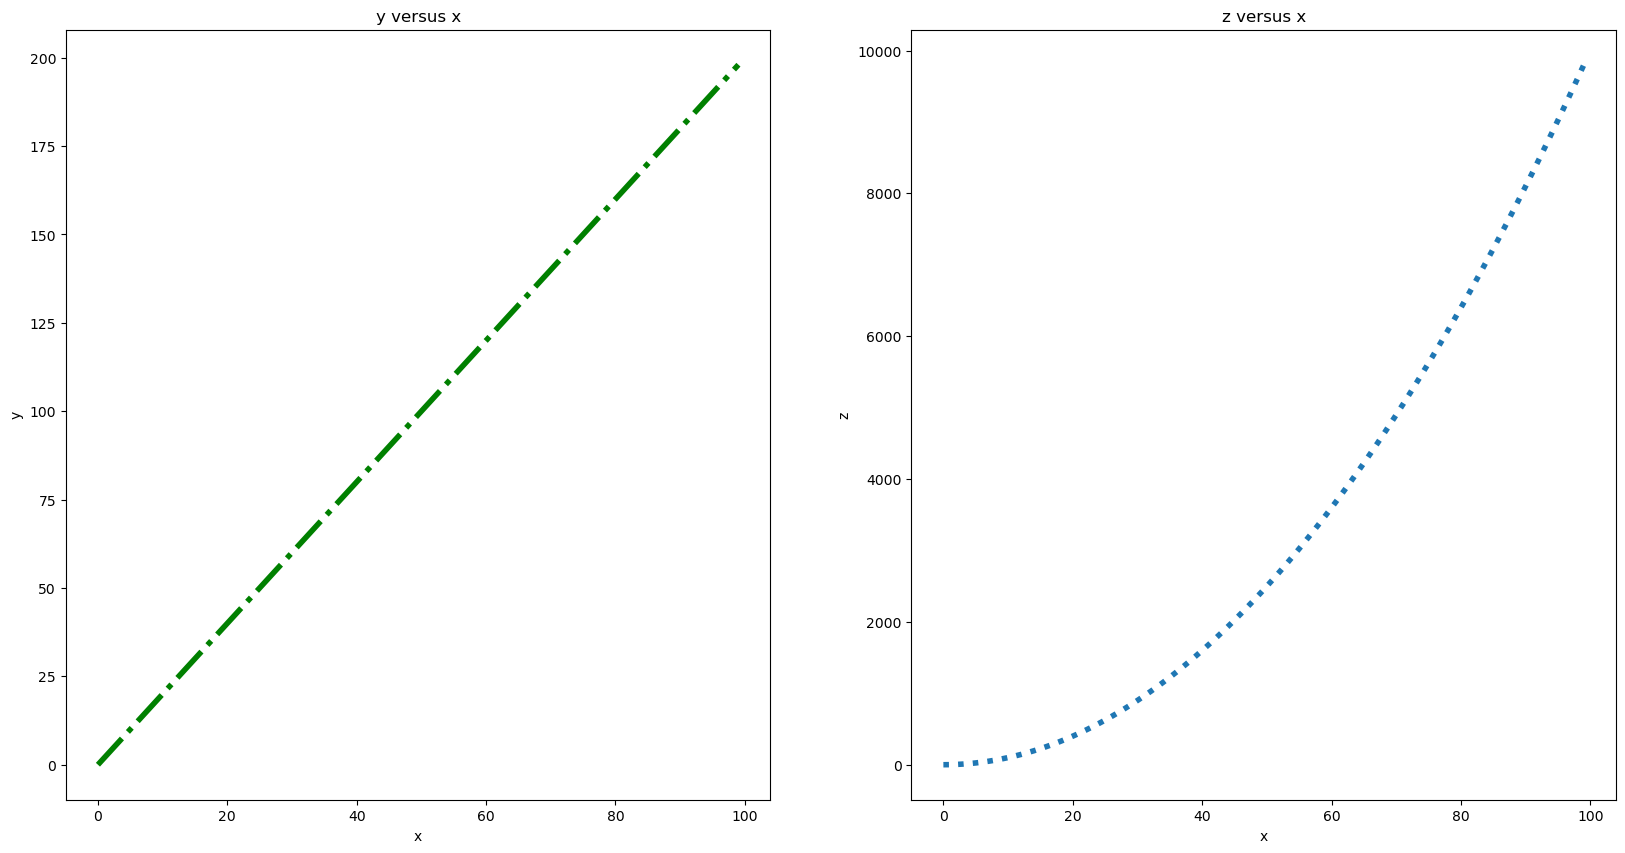

In [39]:
# your code here
plot_options, (chart_1,chart_2) = plt.subplots(nrows=1,ncols=2, figsize =(20,10))
chart_1.plot(x,y,"g",linewidth=4,linestyle="dashdot")
chart_1.set_title("y versus x")
chart_1.set_ylabel("y")
chart_1.set_xlabel("x")

chart_2.plot(x,z,linewidth=4,linestyle="dotted")
chart_2.set_title("z versus x")
chart_2.set_ylabel("z")
chart_2.set_xlabel("x")
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

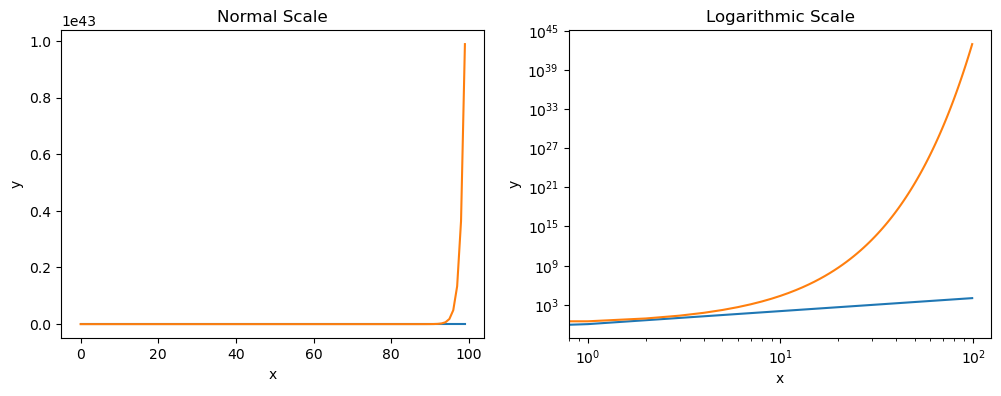

In [54]:
# your code here
plot_options, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#normal scale
ax1.plot(x, x**2)
ax1.plot(x, np.exp(x))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Normal Scale')

#logarithmic scale
ax2.plot(x, x**2)
ax2.plot(x, np.exp(x))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Logarithmic Scale')
ax2.set_xscale('log')
ax2.set_yscale('log')


plt.show()

#### As a bonus challenge, try to add a legend to the plot.

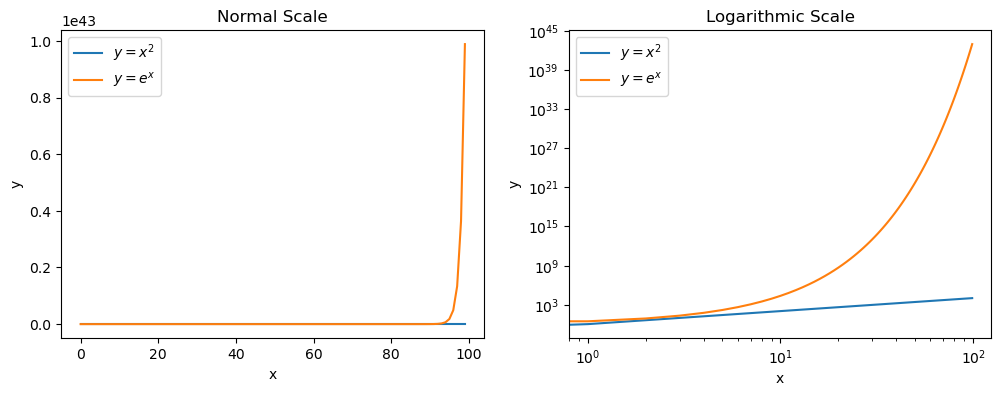

In [61]:
# your code here
plot_options, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

y1=x**2
y2=np.exp(x)

#normal scale
ax1.plot(x,y1,label=r'$y = x^2$')
ax1.plot(x, y2,label=r'$y = e^x$')
ax1.legend(loc='best')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Normal Scale')

#logarithmic scale
ax2.plot(x, y1,label=r'$y = x^2$')
ax2.plot(x, y2,label=r'$y = e^x$')
ax2.legend(loc='best')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Logarithmic Scale')
ax2.set_xscale('log')
ax2.set_yscale('log')


plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [65]:
# your code here
fitbit=pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [66]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [68]:
# your code here
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [71]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [75]:
# NUMERICAL VARIABLES
# your code here
numerical_variables=titanic.select_dtypes(include=["int","float"])
numerical_variables.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [76]:
# CATEGORICAL VARIABLES
# your code here
categorical_variables=titanic.select_dtypes(exclude=["int","float"])
categorical_variables.columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here

#### Use the right visulalization to show the distribution of column `Age`.

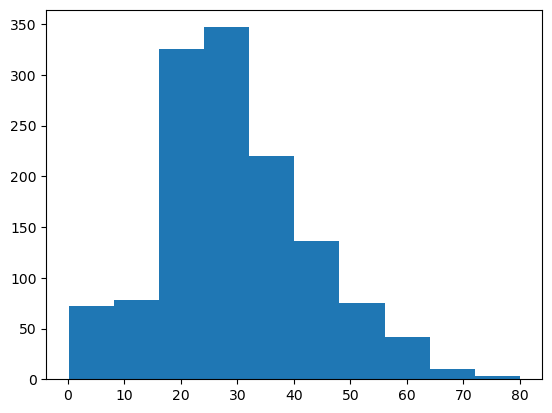

In [82]:
# your code here
plt.hist(titanic["Age"])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

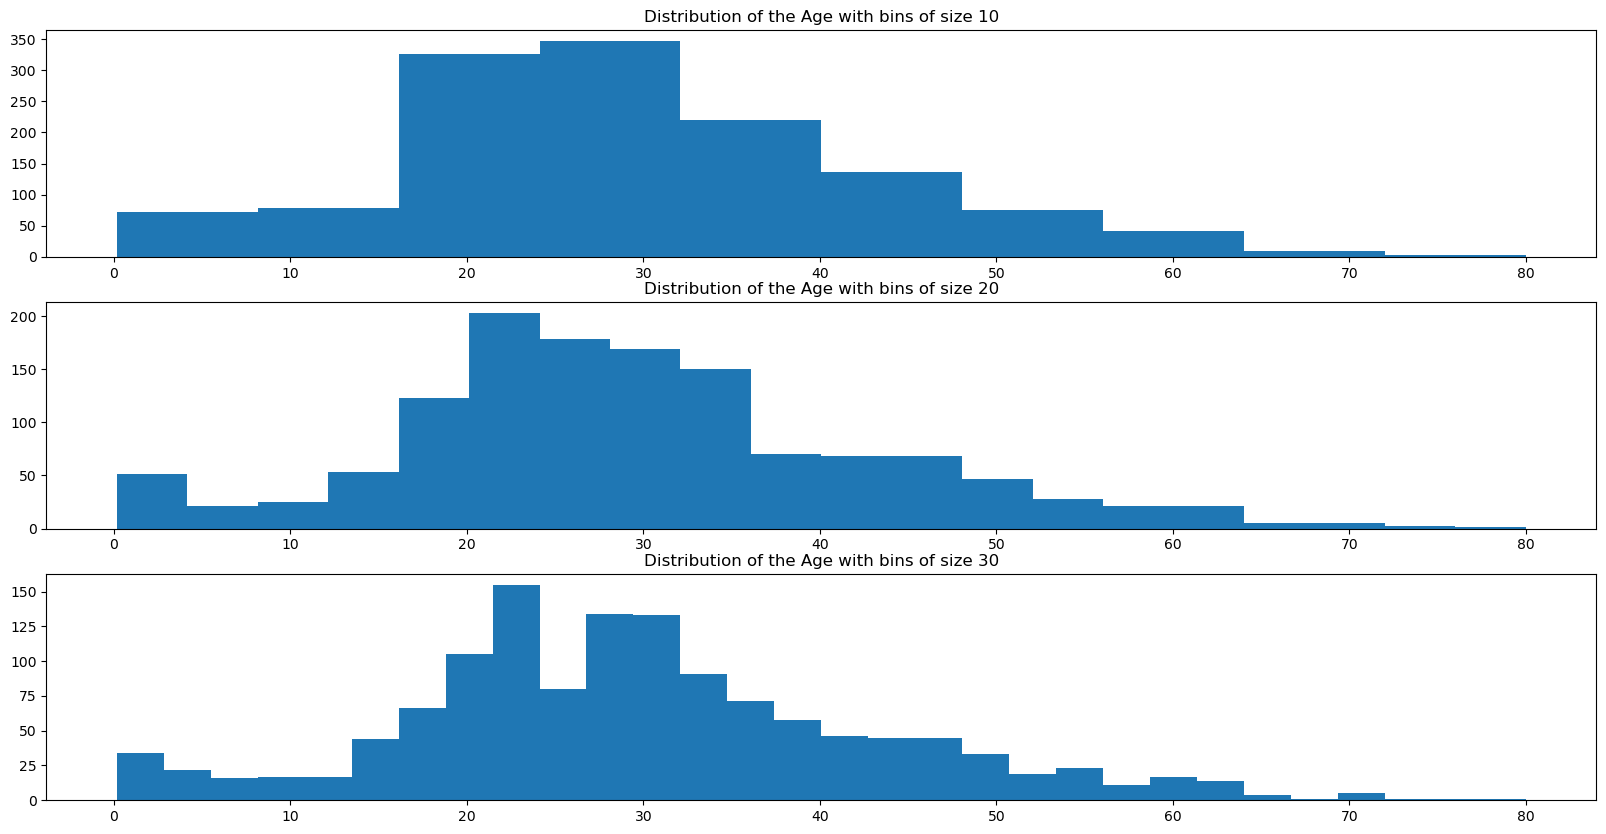

In [86]:
# your code here
plot_options, (bin_10,bin_20,bin_30) = plt.subplots(nrows=3,ncols=1, figsize =(20,10))

bin_10.hist(titanic["Age"], bins=10)
bin_10.set_title('Distribution of the Age with bins of size 10')
bin_20.hist(titanic["Age"], bins=20)
bin_20.set_title('Distribution of the Age with bins of size 20')
bin_30.hist(titanic["Age"], bins=30)
bin_30.set_title('Distribution of the Age with bins of size 30')

plt.show()

#### How does the bin size affect your plot?

In [87]:
#As the number the size of the bins increases, the height of each bin decreases and the distrution tends to be normal

#### Use seaborn to show the distribution of column `Age`.

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


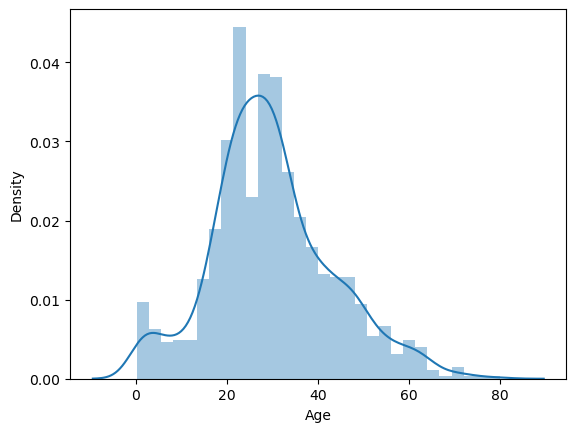

In [89]:
# your code here
sns.distplot(titanic["Age"])

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

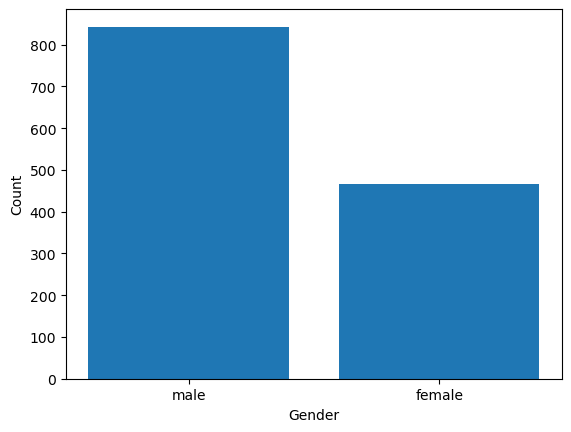

In [94]:
# Method 1 - matplotlib
# your code here
counts = titanic['Gender'].value_counts()


plt.bar(counts.index, counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

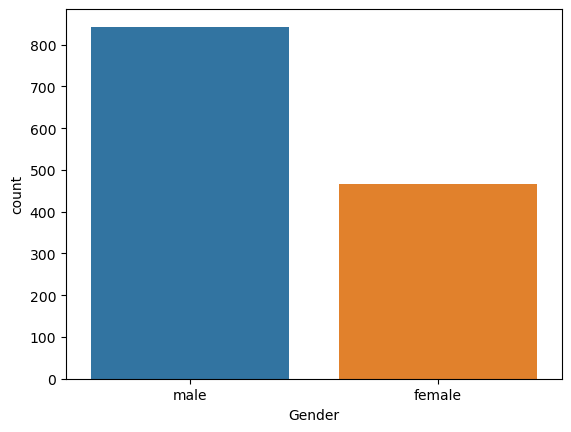

In [93]:
# Method 2 - seaborn
# your code here
sns.countplot(x='Gender', data=titanic)

plt.show()

#### Use the right plot to visualize the column `Pclass`.

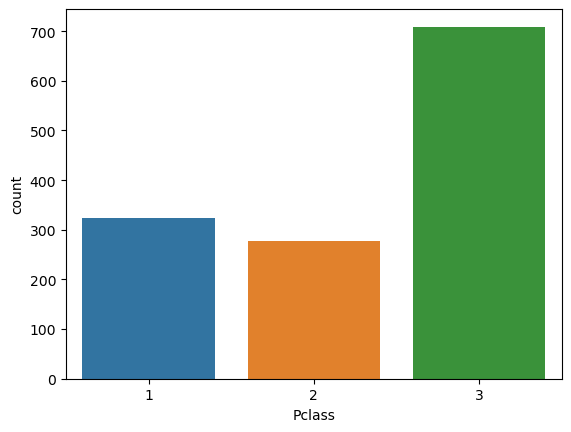

In [95]:
# your code here
sns.countplot(x='Pclass', data=titanic)

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


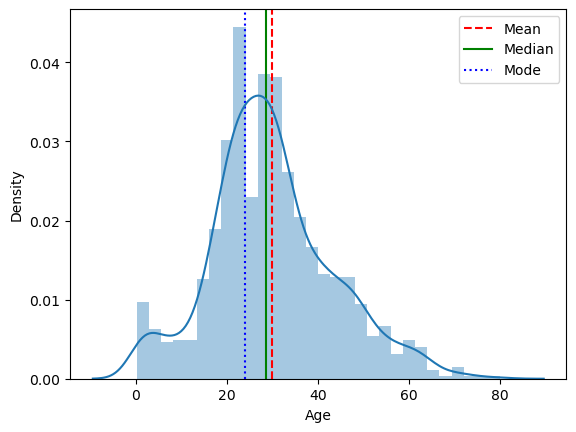

In [101]:
# your code here
mean = titanic["Age"].mean()
median = titanic["Age"].median()
mode = titanic["Age"].mode().values[0]

# Plot the summary statistics
fig, ax = plt.subplots()

ax.axvline(mean, color='r', linestyle='--', label='Mean')
ax.axvline(median, color='g', linestyle='-', label='Median')
ax.axvline(mode, color='b', linestyle=':', label='Mode')

sns.distplot(titanic["Age"], ax=ax)

plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
The Age distribution almost follows a normal distrubtion, as most of the values are around the mean.
However, the distirbution is slitghly skrwed as the mean, median and mode are not aligned. 
Nevertheless, they are very close to each other.
"""

#### What does the last plot tell you about the feature `Age`?

In [103]:
print("The Age mean is ",mean,", the median is ",median,"and the mode is ",mode)
"""
Most people on the titanic were, aprox. 30 years old. Actually, the most frequent age among passengers was 24.
About 50% were at least 28,5 years old.
"""

The Age mean is  29.879185698255316 , the median is  28.5 and the mode is  24.0


'\nMost peop\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


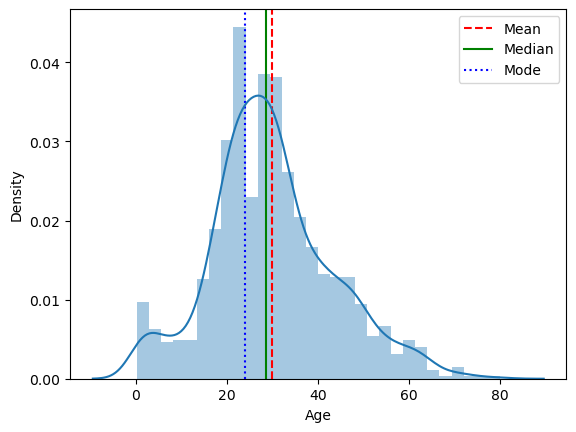

In [104]:
# your code here
# your code here
mean = titanic["Age"].mean()
median = titanic["Age"].median()
mode = titanic["Age"].mode().values[0]

# Plot the summary statistics
fig, ax = plt.subplots()

ax.axvline(mean, color='r', linestyle='--', label='Mean')
ax.axvline(median, color='g', linestyle='-', label='Median')
ax.axvline(mode, color='b', linestyle=':', label='Mode')

sns.distplot(titanic["Age"], ax=ax)

plt.legend()

# Show the plot
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
See previous question
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

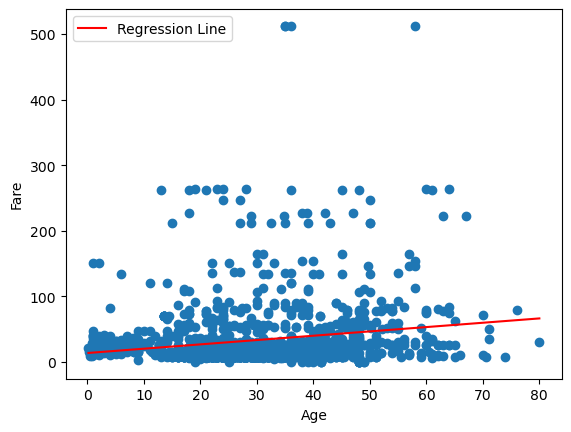

In [111]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic["Age"], titanic["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")

a, b = np.polyfit(titanic["Age"], titanic["Fare"], 1)
x = np.linspace(titanic["Age"].min(), titanic["Age"].max(), 100)
y = a * x + b

plt.plot(x, y, '-r', label='Regression Line')
plt.legend()
plt.show()


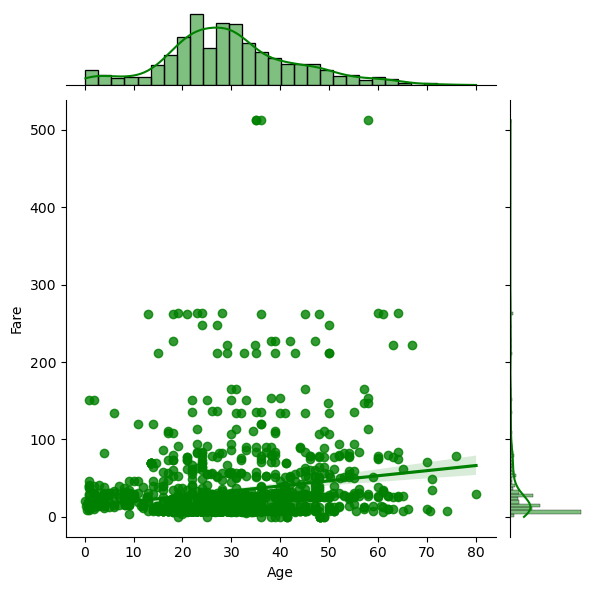

In [116]:
# Method 2 - seaborn
# your code here
sns.jointplot(x="Age", y="Fare", data=titanic, kind="reg", color="green")

plt.show()

In [118]:
only_numerics = titanic.select_dtypes(include = np.number)
only_numerics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [124]:
corr=only_numerics.corr()
corr
mask = np.triu(np.ones_like(corr, dtype = bool))

#### Plot the correlation matrix using seaborn.

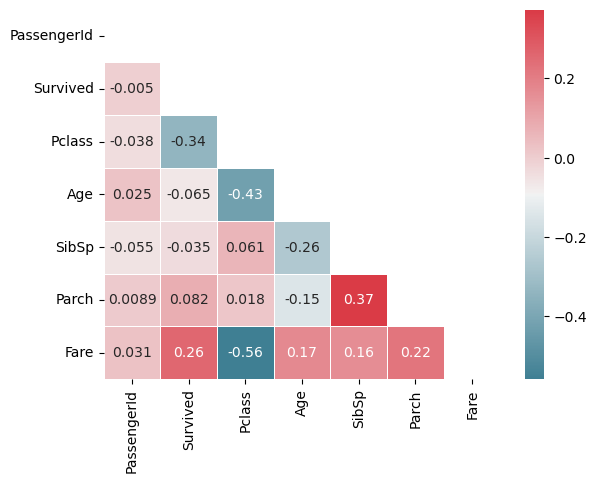

In [126]:
# your code here
cmap = sns.diverging_palette(220,10,as_cmap=True)
#finally the plot

sns.heatmap(corr,mask=mask,cmap=cmap, annot=True,linewidths=0.5)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
The most correlated feautres are ("Fare,Pclass"),(Age,Pclass), (Parch,SibSp)
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

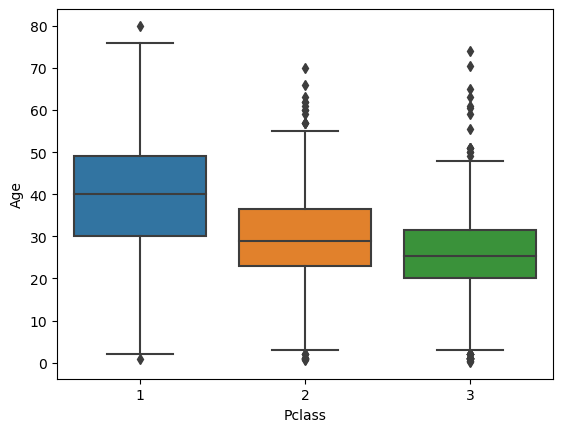

In [127]:
# your code here
sns.boxplot(x="Pclass", y="Age", data=titanic)

# Show the plot
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

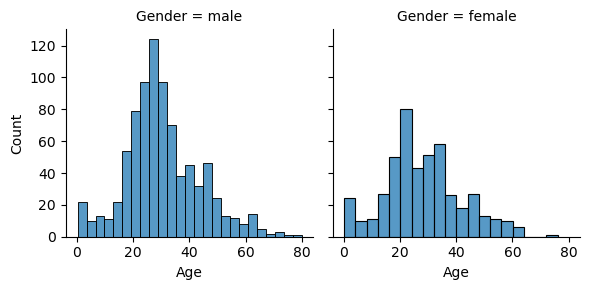

In [128]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")

# Plot a histogram of Age on each facet
g.map(sns.histplot, "Age")

# Show the plot
plt.show()